In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud,STOPWORDS
import seaborn as sns

In [2]:
netflix_overall=pd.read_excel("netflix_titles1.xlsx")
netflix_overall.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

            date_added  release_year rating   duration  \
0  2021-09-25 00:00:00          2020  PG-13     90 min   
1  2021-09-24 00:00:00          2021  TV-MA  2 Seasons   
2  2021-09-24 00:00:00          2021  TV-MA   1 Season   
3  2021-09-24 00:00:00          2021  TV-MA   1 Season   
4  2021-09-24 00:00:00          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [3]:
netflix_overall.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
netflix_overall.shape

(8807, 12)

In [5]:
netflix_overall.describe()

release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

In [6]:
netflix_overall

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

               date_added  release_year rating   duration  \
0     2021-09-25 00:00:00          2020  PG-13     90 min   
1     2021-09-24 00:00:00          2021  TV-MA  2 Seasons   
2     2021-09-24 00:00:00          2021  TV-MA   1 Season   
3     2021-09-24 00:00:00          2021  TV-MA   1 Season   
4     2021-09-24 00:00:00          2021  TV-MA  2 Seasons   
...                   ...           ...    ...        ...   
8802  2019-11-20 00:00:00          2007      R    158 min   
8803  2019-07-01 00:00:00          2018  TV-Y7  2 Seasons   
8804  2019-11-01 00:00:00          2009      R     88 min   
8805  2020-01-11 00:00:00          2006     PG     88 min   
8806  2019-03-02 00:00:00          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

In [7]:
for i in netflix_overall.columns:
    null_rate = netflix_overall[i].isna().sum() / len(netflix_overall) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


In [8]:
netflix_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
print('\nColumns with missing value:') 
print(netflix_overall.isnull().any())


Columns with missing value:
show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool


In [10]:
netflix_overall.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [11]:
netflix_overall.T.apply(lambda x: x.isnull().sum(), axis = 1)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
netflix_overall.isnull().sum().sum()

4307

In [13]:
netflix_overall.duplicated().sum()

0

In [14]:
netflix_overall.director.fillna("No Director", inplace=True)
netflix_overall.cast.fillna("No Cast", inplace=True)
netflix_overall.country.fillna("Country Unavailable", inplace=True)
netflix_overall.dropna(subset=["duration"], inplace=True)
netflix_overall.dropna(subset=["date_added", "rating"], inplace=True)

In [15]:
netflix_overall.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [16]:
netflix_overall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [17]:
netflix_overall.isnull().sum().sum()

0

In [18]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.facecolor"] = '#00000000'

# 1. Understanding what content is available in different countries

In [19]:
country_df = pd.DataFrame(netflix_overall['country'].dropna())

In [20]:
netflix_overall['country'].unique()

array(['United States', 'South Africa', 'Country Unavailable', 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United 

In [21]:
string = str()
for i in country_df['country']:
    string += i+','
countries_list = string.split(',')
l1 = list()
for i in countries_list:
    l1.append(i.strip())
l1
country_df = pd.DataFrame(l1)
country_df.columns = ['country']
country_df

country
0            United States
1             South Africa
2      Country Unavailable
3      Country Unavailable
4                    India
...                    ...
10829  Country Unavailable
10830        United States
10831        United States
10832                India
10833                     

[10834 rows x 1 columns]

In [22]:
# Lets see which country has produced more movies.
filtered_countries1 = netflix_overall['country'].str.split(', ').explode().value_counts()
filtered_countries3 = filtered_countries1[filtered_countries1 != 'Country Unavailable']
print(filtered_countries3)

United States          3680
India                  1046
Country Unavailable     829
United Kingdom          803
Canada                  445
                       ... 
Bermuda                   1
Ecuador                   1
Armenia                   1
Mongolia                  1
Montenegro                1
Name: country, Length: 128, dtype: int64


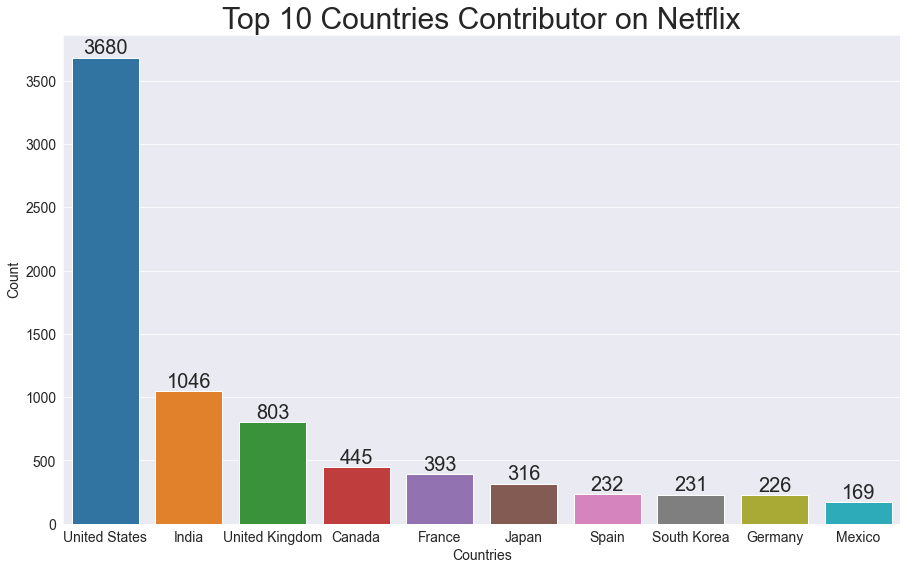

In [23]:
filtered_countries = netflix_overall.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries2 = filtered_countries[filtered_countries != 'Country Unavailable']
plt.figure(figsize=(15,9))
g = sns.countplot(x = filtered_countries2, order=filtered_countries2.value_counts().index[:10])
for p in g.patches:
    g.annotate(p.get_height(), xy = (int(p.get_width()/2 + p.get_x()), p.get_height()), ha = 'center', va = 'bottom', size = 20)
plt.title('Top 10 Countries Contributor on Netflix', size = 30)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()

# A) Countries TV shows and Movies

In [24]:
country1 = filtered_countries3[:11]

In [25]:
country_count=netflix_overall.copy()

In [26]:
netflix_overall["type"].nunique()

2

In [27]:
country_count = pd.concat([country_count,netflix_overall["country"].str.split(",", expand = True)], axis = 1)
country_count

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water      No Director   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans      No Director   
4         s5  TV Show           Kota Factory      No Director   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb      No Director   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast              country  \
0                                               No Cast        United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...         South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  Country Unavailable   
3                                               No Cast  Country Unavailable   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...                India   
...                                                 ...                  ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...        United States   
8803                                            No Cast  Country Unavailable   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...        United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...        United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...                India   

               date_added  release_year rating   duration  ...     2     3  \
0     2021-09-25 00:00:00          2020  PG-13     90 min  ...  None  None   
1     2021-09-24 00:00:00          2021  TV-MA  2 Seasons  ...  None  None   
2     2021-09-24 00:00:00          2021  TV-MA   1 Season  ...  None  None   
3     2021-09-24 00:00:00          2021  TV-MA   1 Season  ...  None  None   
4     2021-09-24 00:00:00          2021  TV-MA  2 Seasons  ...  None  None   
...                   ...           ...    ...        ...  ...   ...   ...   
8802  2019-11-20 00:00:00          2007      R    158 min  ...  None  None   
8803  2019-07-01 00:00:00          2018  TV-Y7  2 Seasons  ...  None  None   
8804  2019-11-01 00:00:00          2009      R     88 min  ...  None  None   
8805  2020-01-11 00:00:00          2006     PG     88 min  ...  None  None   
8806  2019-03-02 00:00:00          2015  TV-14    111 min  ...  None  None   

         4     5     6     7     8     9    10    11  
0     None  None  None  None  None  None  None  None  
1     None  None  None  None  None  None  None  None  
2     None  None  None  None  None  None  None  None  
3     None  None  None  None  None  None  None  None  
4     None  None  None  None  None  None  None  None  
...    ...   ...   ...   ...   ...   ...   ...   ...  
8802  None  None  None  None  None  None  None  None  
8803  None  None  None  None  None  None  None  None  
8804  None  None  None  None  None  None  None  None  
8805  None  None  None  None  None  None  None  None  
8806  None  None  None  None  None  None  None  None  

[8790 rows x 24 columns]

In [28]:
country_count = country_count.melt(id_vars = ["type", "title"], value_vars = range(12), value_name = "country")
country_count = country_count[country_count["country"].notna()]
country_count

C:\Users\SANJEE~1\AppData\Local\Temp/ipykernel_10676/3713054496.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  country_count = country_count.melt(id_vars = ["type", "title"], value_vars = range(12), value_name = "country")


type                  title variable              country
0         Movie   Dick Johnson Is Dead        0        United States
1       TV Show          Blood & Water        0         South Africa
2       TV Show              Ganglands        0  Country Unavailable
3       TV Show  Jailbirds New Orleans        0  Country Unavailable
4       TV Show           Kota Factory        0                India
...         ...                    ...      ...                  ...
78706     Movie    The Look of Silence        8              Germany
85337     Movie               Barbecue        9               Sweden
87496     Movie    The Look of Silence        9          Netherlands
94127     Movie               Barbecue       10        United States
102917    Movie               Barbecue       11              Uruguay

[10833 rows x 4 columns]

United States : Movie      2055
TV Show     754
Name: type, dtype: int64
**************************************************


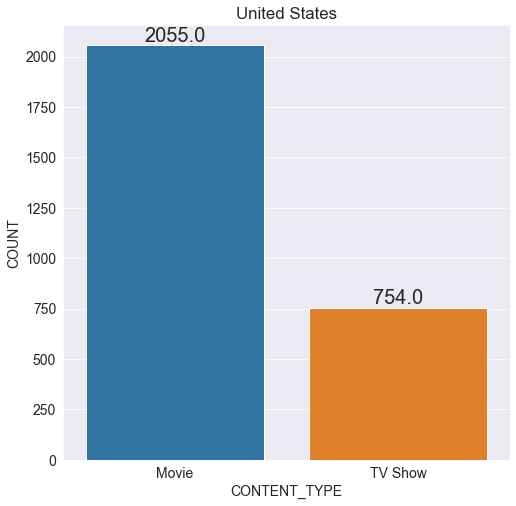

India : Movie      893
TV Show     79
Name: type, dtype: int64
**************************************************


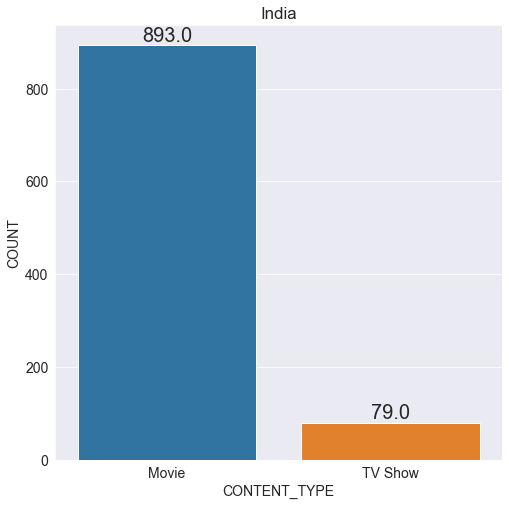

Country Unavailable : Movie      439
TV Show    390
Name: type, dtype: int64
**************************************************


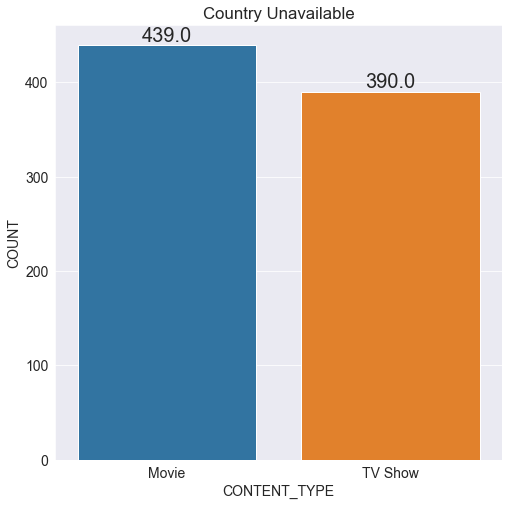

United Kingdom : TV Show    212
Movie      206
Name: type, dtype: int64
**************************************************


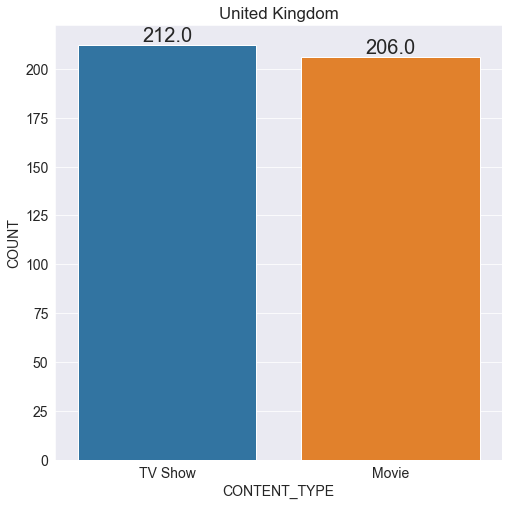

Canada : Movie      122
TV Show     59
Name: type, dtype: int64
**************************************************


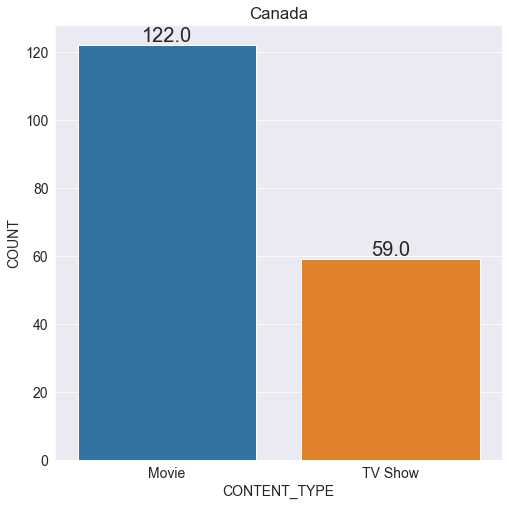

France : Movie      75
TV Show    49
Name: type, dtype: int64
**************************************************


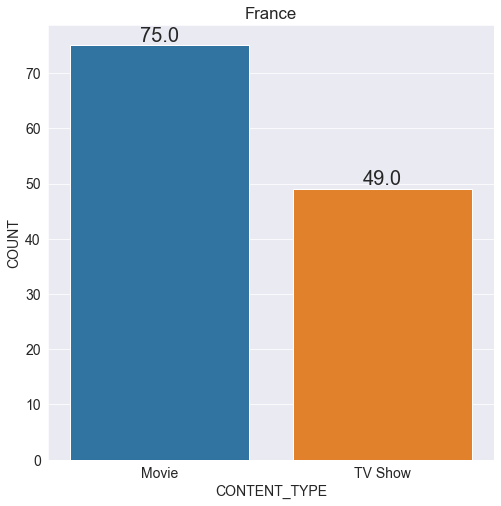

Japan : TV Show    167
Movie       76
Name: type, dtype: int64
**************************************************


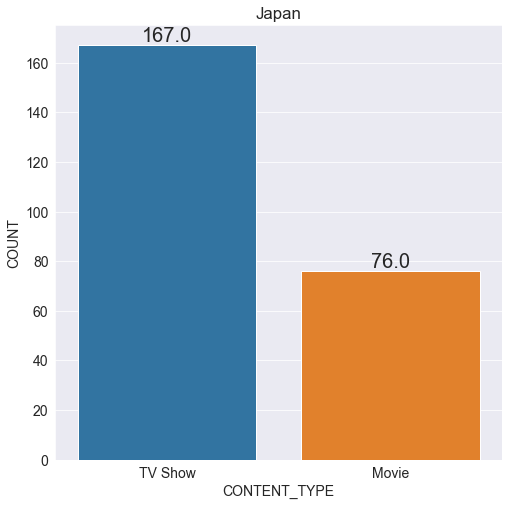

Spain : Movie      97
TV Show    48
Name: type, dtype: int64
**************************************************


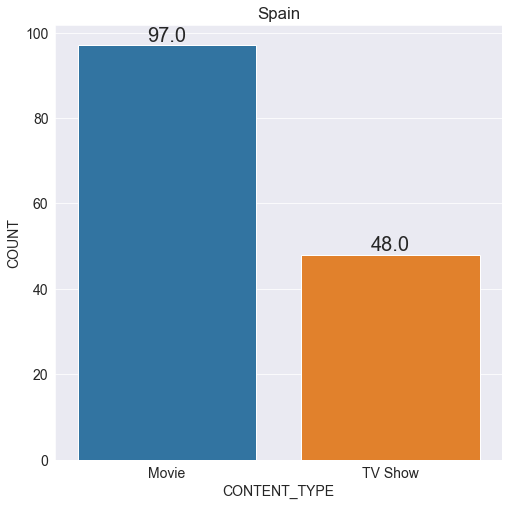

South Korea : TV Show    158
Movie       41
Name: type, dtype: int64
**************************************************


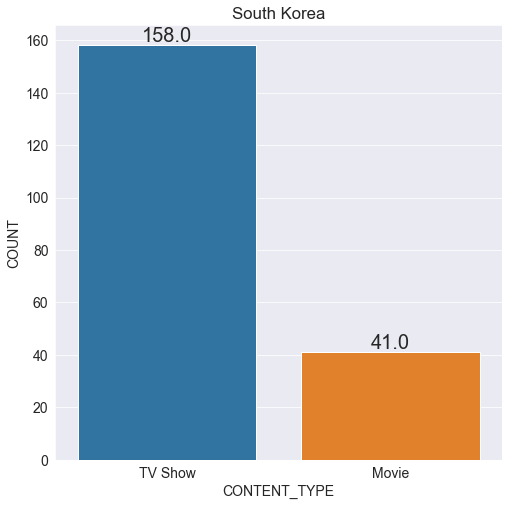

Germany : Movie      47
TV Show    20
Name: type, dtype: int64
**************************************************


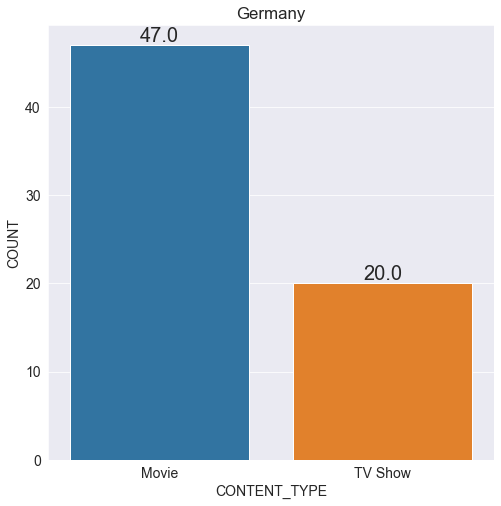

Mexico : Movie      70
TV Show    40
Name: type, dtype: int64
**************************************************


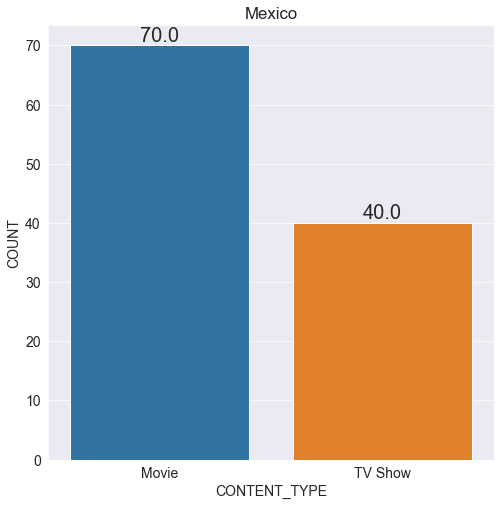

In [29]:
for country in country1.index:
    netflix_country = netflix_overall[netflix_overall['country'] == str(country)]
    count_type = netflix_country['type'].value_counts()
    print(country,':',count_type)
    print('*'*50)
    plt.figure(figsize = (8,8))
    dff = sns.barplot(x = count_type.index, y = count_type)
    for p in dff.patches:
        dff.annotate(p.get_height(), xy = (int(p.get_width()/2 + p.get_x()), p.get_height()), ha = 'center', va = 'bottom', size = 20)
    plt.title(country)
    plt.xlabel('CONTENT_TYPE')
    plt.ylabel('COUNT')
    plt.show()

In [30]:
netflix_overall_type = netflix_overall.groupby('type')['country'].value_counts(ascending = False)
netflix_overall_type

type     country                                 
Movie    United States                               2055
         India                                        893
         Country Unavailable                          439
         United Kingdom                               206
         Canada                                       122
                                                     ... 
TV Show  United States, Russia                          1
         United States, Singapore                       1
         United States, Sweden                          1
         United States, United Kingdom, Australia       1
         Uruguay, Germany                               1
Name: country, Length: 849, dtype: int64

# 2. Identifying similar content by matching text-based features

In [98]:
print(netflix_overall["description"])

0       As her father nears the end of his life, filmm...
1       After crossing paths at a party, a Cape Town t...
2       To protect his family from a powerful drug lor...
3       Feuds, flirtations and toilet talk go down amo...
4       In a city of coaching centers known to train I...
                              ...                        
8802    A political cartoonist, a crime reporter and a...
8803    While living alone in a spooky town, a young g...
8804    Looking to survive in a world taken over by zo...
8805    Dragged from civilian life, a former superhero...
8806    A scrappy but poor boy worms his way into a ty...
Name: description, Length: 8790, dtype: object


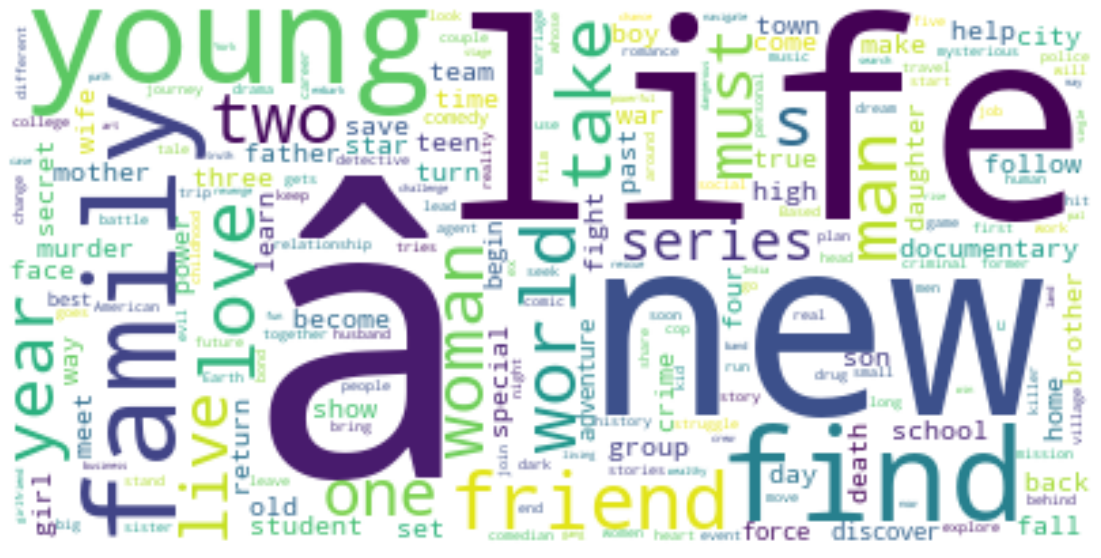

In [99]:
text = " ".join(description for description in netflix_overall.description)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize = (20, 10))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

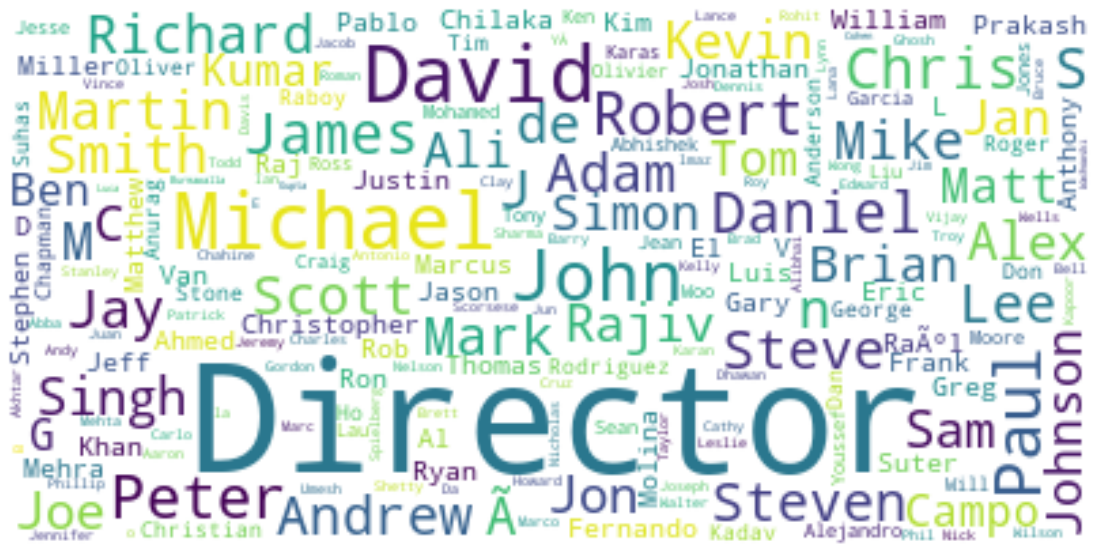

In [100]:
text = " ".join(director for director in netflix_overall.director)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize = (20, 10))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

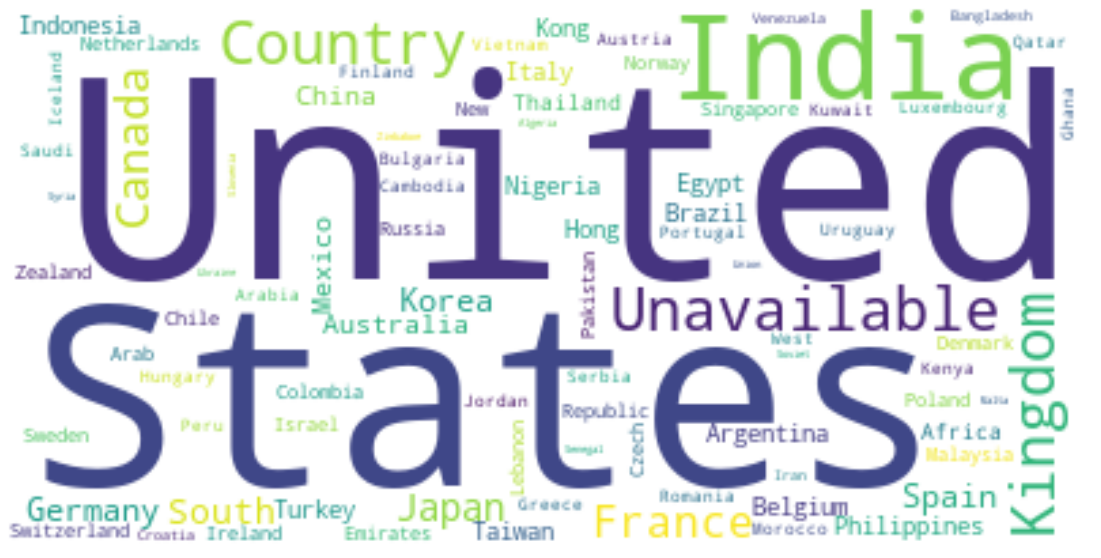

In [101]:
text = " ".join(country for country in netflix_overall.country)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize = (20, 10))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

# 3. Network analysis of Actors / Directors and find interesting insights

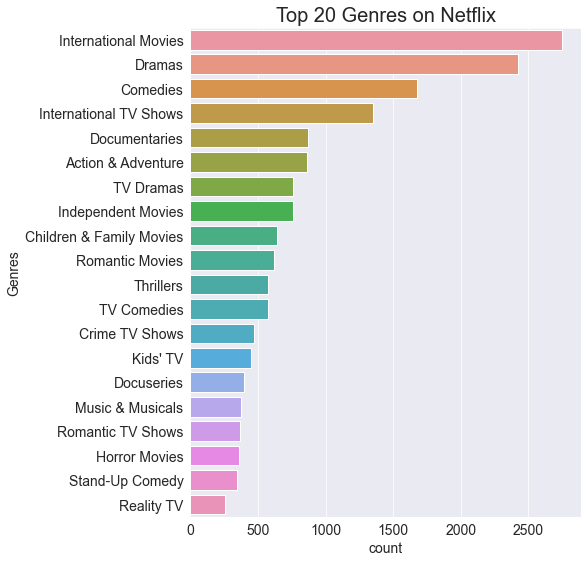

In [32]:
filtered_genres = netflix_overall.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix',size = 20)
plt.xlabel('count')
plt.ylabel('Genres')
plt.show()

# A) Network analysis of Directors and find interesting insights

In [33]:
# Lets see which director has directed more movies.
director =[]
for i in netflix_overall['director'].str.split(', ').explode():
    director.append(i)
d1 = pd.Series(director).value_counts()
d1.drop(labels = 'No Director', inplace = True)
print(d1)

Rajiv Chilaka     22
Jan Suter         21
RaÃºl Campos      19
Marcus Raboy      16
Suhas Kadav       16
                  ..
Raymie Muzquiz     1
Stu Livingston     1
Joe Menendez       1
Eric Bross         1
Mozez Singh        1
Length: 4991, dtype: int64


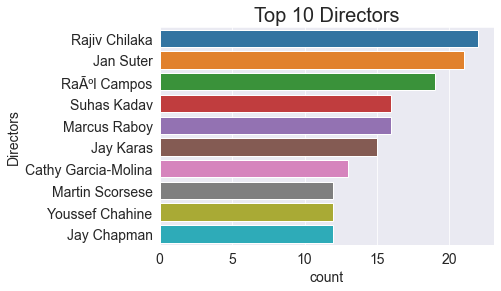

In [34]:
filtered_directors = netflix_overall[netflix_overall.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10])
plt.title('Top 10 Directors',size = 20)
plt.ylabel('Directors')
plt.show()

## a) Top 10 Movie directors 

In [35]:
netflix_df_movie_type = netflix_overall[netflix_overall['type']=='Movie']
netflix_df_movie_type

show_id   type                             title  \
0         s1  Movie              Dick Johnson Is Dead   
6         s7  Movie  My Little Pony: A New Generation   
7         s8  Movie                           Sankofa   
9        s10  Movie                      The Starling   
12       s13  Movie                      Je Suis Karl   
...      ...    ...                               ...   
8801   s8802  Movie                           Zinzana   
8802   s8803  Movie                            Zodiac   
8804   s8805  Movie                        Zombieland   
8805   s8806  Movie                              Zoom   
8806   s8807  Movie                            Zubaan   

                            director  \
0                    Kirsten Johnson   
6     Robert Cullen, JosÃ© Luis Ucha   
7                       Haile Gerima   
9                     Theodore Melfi   
12               Christian Schwochow   
...                              ...   
8801                 Majid Al Ansari   
8802                   David Fincher   
8804                 Ruben Fleischer   
8805                    Peter Hewitt   
8806                     Mozez Singh   

                                                   cast  \
0                                               No Cast   
6     Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
9     Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12    Luna Wedler, Jannis NiewÃ¶hner, Milan Peschel,...   
...                                                 ...   
8801  Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   

                                                country           date_added  \
0                                         United States  2021-09-25 00:00:00   
6                                   Country Unavailable  2021-09-24 00:00:00   
7     United States, Ghana, Burkina Faso, United Kin...  2021-09-24 00:00:00   
9                                         United States  2021-09-24 00:00:00   
12                              Germany, Czech Republic  2021-09-23 00:00:00   
...                                                 ...                  ...   
8801                       United Arab Emirates, Jordan  2016-03-09 00:00:00   
8802                                      United States  2019-11-20 00:00:00   
8804                                      United States  2019-11-01 00:00:00   
8805                                      United States  2020-01-11 00:00:00   
8806                                              India  2019-03-02 00:00:00   

      release_year rating duration  \
0             2020  PG-13   90 min   
6             2021     PG   91 min   
7             1993  TV-MA  125 min   
9             2021  PG-13  104 min   
12            2021  TV-MA  127 min   
...            ...    ...      ...   
8801          2015  TV-MA   96 min   
8802          2007      R  158 min   
8804          2009      R   88 min   
8805          2006     PG   88 min   
8806          2015  TV-14  111 min   

                                             listed_in  \
0                                        Documentaries   
6                             Children & Family Movies   
7     Dramas, Independent Movies, International Movies   
9                                     Comedies, Dramas   
12                        Dramas, International Movies   
...                                                ...   
8801           Dramas, International Movies, Thrillers   
8802                    Cult Movies, Dramas, Thrillers   
8804                           Comedies, Horror Movies   
8805                Children & Family Movies, Comedies   
8806    Dramas, International Movies, Music & Musicals   

               

In [36]:
movie_dir = netflix_df_movie_type['director'].str.split(', ').explode().value_counts()
movie_dir.drop(index = 'No Director', inplace = True)
movie_dir_top10 = movie_dir[:10]
movie_dir_top10

Rajiv Chilaka          22
Jan Suter              21
RaÃºl Campos           19
Suhas Kadav            16
Marcus Raboy           15
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Jay Chapman            12
Youssef Chahine        12
Name: director, dtype: int64

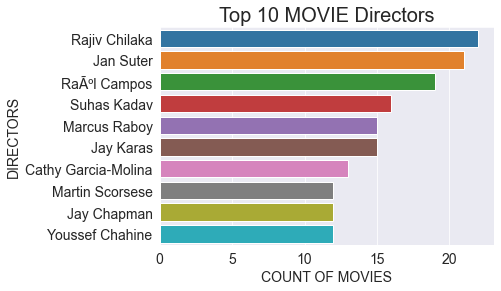

In [37]:
dff = sns.barplot(y = movie_dir_top10.index, x = movie_dir_top10)
for p in dff.patches:
    dff.annotate(p.get_width(), xy = (int(p.get_height()/2 + p.get_x()), p.get_width()), ha = 'center', va = 'bottom', size = 14)    
plt.title('Top 10 MOVIE Directors', size = 20)
plt.xlabel('COUNT OF MOVIES')
plt.ylabel('DIRECTORS')
plt.show()

## b) Top 10 TV Show directors 

In [38]:
netflix_df_TVshow_type = netflix_overall[netflix_overall['type']=='TV Show']
netflix_df_TVshow_type

show_id     type                  title         director  \
1         s2  TV Show          Blood & Water      No Director   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans      No Director   
4         s5  TV Show           Kota Factory      No Director   
5         s6  TV Show          Midnight Mass    Mike Flanagan   
...      ...      ...                    ...              ...   
8795   s8796  TV Show        Yu-Gi-Oh! Arc-V      No Director   
8796   s8797  TV Show             Yunus Emre      No Director   
8797   s8798  TV Show              Zak Storm      No Director   
8800   s8801  TV Show     Zindagi Gulzar Hai      No Director   
8803   s8804  TV Show            Zombie Dumb      No Director   

                                                   cast  \
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
3                                               No Cast   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   
5     Kate Siegel, Zach Gilford, Hamish Linklater, H...   
...                                                 ...   
8795  Mike Liscio, Emily Bauer, Billy Bob Thompson, ...   
8796  GÃ¶khan Atalay, Payidar TÃ¼fekÃ§ioglu, Baran A...   
8797  Michael Johnston, Jessica Gee-George, Christin...   
8800  Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...   
8803                                            No Cast   

                                            country           date_added  \
1                                      South Africa  2021-09-24 00:00:00   
2                               Country Unavailable  2021-09-24 00:00:00   
3                               Country Unavailable  2021-09-24 00:00:00   
4                                             India  2021-09-24 00:00:00   
5                               Country Unavailable  2021-09-24 00:00:00   
...                                             ...                  ...   
8795                                  Japan, Canada  2018-05-01 00:00:00   
8796                                         Turkey  2017-01-17 00:00:00   
8797  United States, France, South Korea, Indonesia  2018-09-13 00:00:00   
8800                                       Pakistan  2016-12-15 00:00:00   
8803                            Country Unavailable  2019-07-01 00:00:00   

      release_year rating   duration  \
1             2021  TV-MA  2 Seasons   
2             2021  TV-MA   1 Season   
3             2021  TV-MA   1 Season   
4             2021  TV-MA  2 Seasons   
5             2021  TV-MA   1 Season   
...            ...    ...        ...   
8795          2015  TV-Y7  2 Seasons   
8796          2016  TV-PG  2 Seasons   
8797          2016  TV-Y7  3 Seasons   
8800          2012  TV-PG   1 Season   
8803          2018  TV-Y7  2 Seasons   

                                              listed_in  \
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
5                    TV Dramas, TV Horror, TV Mysteries   
...                                                 ...   
8795                             Anime Series, Kids' TV   
8796                  International TV Shows, TV Dramas   
8797                                           Kids' TV   
8800  International TV Shows, Romantic TV Shows, TV ...   
8803             Kids' TV, Korean TV Shows, TV Comedies   

                                            description  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
5     The arrival of a charismatic young priest brin...  
...                                                 ...  
8795  

In [39]:
TV_shows_dir = netflix_df_TVshow_type['director'].str.split(', ').explode().value_counts()
TV_shows_dir.drop(index = 'No Director', inplace = True)
TV_shows_dir_top10 = TV_shows_dir[:10]
TV_shows_dir_top10

Alastair Fothergill      3
Ken Burns                3
Iginio Straffi           2
Gautham Vasudev Menon    2
Hsu Fu-chun              2
Stan Lathan              2
Shin Won-ho              2
Joe Berlinger            2
Lynn Novick              2
Rob Seidenglanz          2
Name: director, dtype: int64

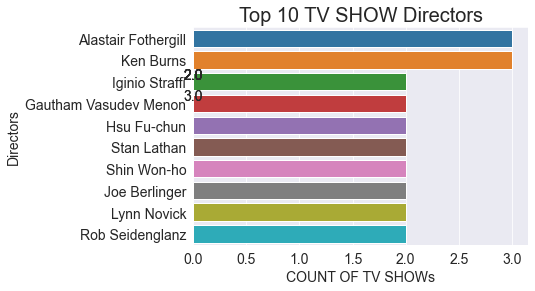

In [40]:
dff = sns.barplot(y = TV_shows_dir_top10.index, x = TV_shows_dir_top10)
for p in dff.patches:
    dff.annotate(p.get_width(), xy = (int(p.get_height()/2 + p.get_x()), p.get_width()), ha = 'center', va = 'bottom', size = 14)    
plt.title('Top 10 TV SHOW Directors', size = 20)
plt.xlabel('COUNT OF TV SHOWs')
plt.ylabel('Directors')
plt.show()

# B) Network analysis of Actors and find interesting insights

In [41]:
TV_shows_act = netflix_df_TVshow_type['cast'].str.split(', ').explode().value_counts()
TV_shows_act_top10 = TV_shows_act[:10]
TV_shows_act_top10.drop(index = "No Cast", inplace = True)
TV_shows_act_top10

Takahiro Sakurai      25
Yuki Kaji             19
Junichi Suwabe        17
Daisuke Ono           17
Ai Kayano             16
Yuichi Nakamura       16
Jun Fukuyama          15
Yoshimasa Hosoya      15
David Attenborough    14
Name: cast, dtype: int64

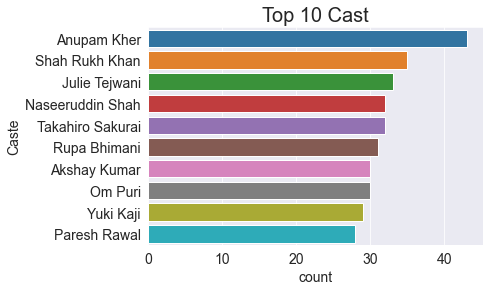

In [42]:
filtered_cast = netflix_overall[netflix_overall.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:10])
plt.title('Top 10 Cast',size = 20)
plt.ylabel('Caste')
plt.show()

In [43]:
netflix_movies_df = netflix_overall[netflix_overall.type.str.contains("Movie")]

In [44]:
netflix_shows_df = netflix_overall[netflix_overall.type.str.contains("TV Show")]

# Top 10 show Actors

In [45]:
TV_shows_act = netflix_df_TVshow_type['cast'].str.split(', ').explode().value_counts()
TV_shows_act_top10 = TV_shows_act[:10]
TV_shows_act_top10.drop(index = "No Cast", inplace = True)
TV_shows_act_top10

Takahiro Sakurai      25
Yuki Kaji             19
Junichi Suwabe        17
Daisuke Ono           17
Ai Kayano             16
Yuichi Nakamura       16
Jun Fukuyama          15
Yoshimasa Hosoya      15
David Attenborough    14
Name: cast, dtype: int64

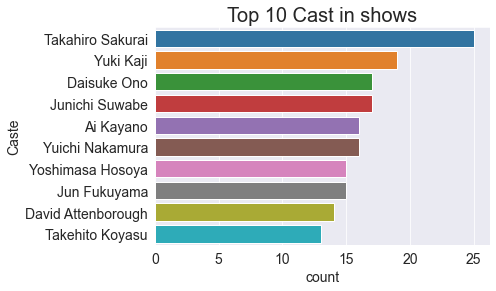

In [46]:
filtered_cast_shows = netflix_shows_df[netflix_shows_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10])
plt.title('Top 10 Cast in shows',size = 20)
plt.ylabel('Caste')
plt.show()

# Top 10 Movie Actors

In [47]:
movie_act = netflix_df_movie_type['cast'].str.split(', ').explode().value_counts()
movie_act.drop(index = "No Cast", inplace = True)
movie_act_top10 = movie_act[:10]
movie_act_top10

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    32
Akshay Kumar        30
Om Puri             30
Julie Tejwani       28
Paresh Rawal        28
Amitabh Bachchan    28
Boman Irani         27
Rupa Bhimani        27
Name: cast, dtype: int64

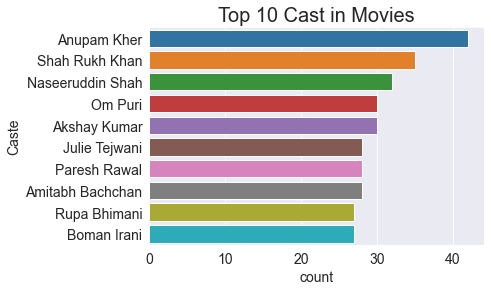

In [48]:
filtered_cast_movie = netflix_movies_df[netflix_movies_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_cast_movie, order=filtered_cast_movie.value_counts().index[:10])
plt.title('Top 10 Cast in Movies',size = 20)
plt.ylabel('Caste')
plt.show()

# 4. Does Netflix has more focus on TV Shows than movies in recent years

In [49]:
netflix_overall["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

# A) release year of TV shows

In [50]:
netflix_overall[(netflix_overall['type']=="TV Show")&(netflix_overall["release_year"])]

show_id     type                   title         director  \
1         s2  TV Show           Blood & Water      No Director   
2         s3  TV Show               Ganglands  Julien Leclercq   
3         s4  TV Show   Jailbirds New Orleans      No Director   
4         s5  TV Show            Kota Factory      No Director   
5         s6  TV Show           Midnight Mass    Mike Flanagan   
...      ...      ...                     ...              ...   
8740   s8741  TV Show             Wild Alaska      No Director   
8741   s8742  TV Show             Wild Arabia      No Director   
8758   s8759  TV Show  World's Busiest Cities      No Director   
8780   s8781  TV Show            Yo-Kai Watch      No Director   
8795   s8796  TV Show         Yu-Gi-Oh! Arc-V      No Director   

                                                   cast              country  \
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...         South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  Country Unavailable   
3                                               No Cast  Country Unavailable   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...                India   
5     Kate Siegel, Zach Gilford, Hamish Linklater, H...  Country Unavailable   
...                                                 ...                  ...   
8740                                      Dougray Scott       United Kingdom   
8741                                   Alexander Siddig       United Kingdom   
8758                 Anita Rani, Ade Adepitan, Dan Snow       United Kingdom   
8780  Johnny Yong Bosch, J.W. Terry, Alicyn Packard,...        United States   
8795  Mike Liscio, Emily Bauer, Billy Bob Thompson, ...        Japan, Canada   

               date_added  release_year rating   duration  \
1     2021-09-24 00:00:00          2021  TV-MA  2 Seasons   
2     2021-09-24 00:00:00          2021  TV-MA   1 Season   
3     2021-09-24 00:00:00          2021  TV-MA   1 Season   
4     2021-09-24 00:00:00          2021  TV-MA  2 Seasons   
5     2021-09-24 00:00:00          2021  TV-MA   1 Season   
...                   ...           ...    ...        ...   
8740  2017-03-31 00:00:00          2015  TV-PG   1 Season   
8741  2017-03-31 00:00:00          2013  TV-PG   1 Season   
8758  2019-02-01 00:00:00          2017  TV-PG   1 Season   
8780  2016-04-01 00:00:00          2015  TV-Y7   1 Season   
8795  2018-05-01 00:00:00          2015  TV-Y7  2 Seasons   

                                              listed_in  \
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
5                    TV Dramas, TV Horror, TV Mysteries   
...                                                 ...   
8740  British TV Shows, Docuseries, Science & Nature TV   
8741  British TV Shows, Docuseries, Science & Nature TV   
8758                       British TV Shows, Docuseries   
8780                             Anime Series, Kids' TV   
8795                             Anime Series, Kids' TV   

                                            description  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
5     The arrival of a charismatic young priest brin...  
...                                                 ...  
8740  The natural bounty of Alaska sustains its dive...  
8741  The widely varied geology and dramatic landsca...  
8758  From Moscow to Mexico City, three BBC journali...  
8780  Nate frees a mythical being trapped in a magic...  
8795  Now that he's discovered the Pendulum Summonin...  

[1338 rows x 12 columns]

# B) release year of Movies

In [51]:
netflix_overall[(netflix_overall['type']=="Movie")&(netflix_overall["release_year"])]

show_id   type                             title  \
6         s7  Movie  My Little Pony: A New Generation   
7         s8  Movie                           Sankofa   
9        s10  Movie                      The Starling   
12       s13  Movie                      Je Suis Karl   
13       s14  Movie  Confessions of an Invisible Girl   
...      ...    ...                               ...   
8799   s8800  Movie                             Zenda   
8801   s8802  Movie                           Zinzana   
8802   s8803  Movie                            Zodiac   
8804   s8805  Movie                        Zombieland   
8806   s8807  Movie                            Zubaan   

                            director  \
6     Robert Cullen, JosÃ© Luis Ucha   
7                       Haile Gerima   
9                     Theodore Melfi   
12               Christian Schwochow   
13                     Bruno Garotti   
...                              ...   
8799                  Avadhoot Gupte   
8801                 Majid Al Ansari   
8802                   David Fincher   
8804                 Ruben Fleischer   
8806                     Mozez Singh   

                                                   cast  \
6     Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
9     Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12    Luna Wedler, Jannis NiewÃ¶hner, Milan Peschel,...   
13    Klara Castanho, Lucca Picon, JÃºlia Gomes, Mar...   
...                                                 ...   
8799  Santosh Juvekar, Siddharth Chandekar, Sachit P...   
8801  Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   

                                                country           date_added  \
6                                   Country Unavailable  2021-09-24 00:00:00   
7     United States, Ghana, Burkina Faso, United Kin...  2021-09-24 00:00:00   
9                                         United States  2021-09-24 00:00:00   
12                              Germany, Czech Republic  2021-09-23 00:00:00   
13                                  Country Unavailable  2021-09-22 00:00:00   
...                                                 ...                  ...   
8799                                              India  2018-02-15 00:00:00   
8801                       United Arab Emirates, Jordan  2016-03-09 00:00:00   
8802                                      United States  2019-11-20 00:00:00   
8804                                      United States  2019-11-01 00:00:00   
8806                                              India  2019-03-02 00:00:00   

      release_year rating duration  \
6             2021     PG   91 min   
7             1993  TV-MA  125 min   
9             2021  PG-13  104 min   
12            2021  TV-MA  127 min   
13            2021  TV-PG   91 min   
...            ...    ...      ...   
8799          2009  TV-14  120 min   
8801          2015  TV-MA   96 min   
8802          2007      R  158 min   
8804          2009      R   88 min   
8806          2015  TV-14  111 min   

                                             listed_in  \
6                             Children & Family Movies   
7     Dramas, Independent Movies, International Movies   
9                                     Comedies, Dramas   
12                        Dramas, International Movies   
13                  Children & Family Movies, Comedies   
...                                                ...   
8799                      Dramas, International Movies   
8801           Dramas, International Movies, Thrillers   
8802                    Cult Movies, Dramas, Thrillers   
8804                           Comedies, Horror Movies   
8806    Dramas, International Movies, Music & Musicals   

               

In [52]:
netflix_overall['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

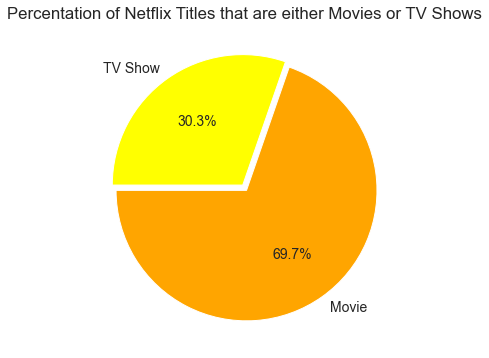

In [53]:
plt.figure(figsize=(12,6))
plt.title("Percentation of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(netflix_overall.type.value_counts(),explode=(0.025,0.025), labels=netflix_overall.type.value_counts().index, colors=['Orange','yellow'],autopct='%1.1f%%', startangle=180)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


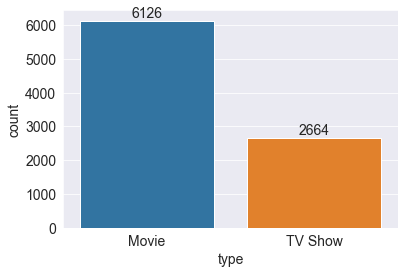

In [54]:
dff = sns.countplot(netflix_overall['type'])
for p in dff.patches:
    dff.annotate(p.get_height(), xy = (int(p.get_width()/2 + p.get_x()), p.get_height()), ha = 'center', va = 'bottom')
    
plt.show()

In [55]:
netflix_overall.year_added = pd.DatetimeIndex(netflix_overall.date_added).year
netflix_movies_df.year_added = pd.DatetimeIndex(netflix_movies_df.date_added).year
netflix_shows_df.year_added = pd.DatetimeIndex(netflix_shows_df.date_added).year

C:\Users\SANJEE~1\AppData\Local\Temp/ipykernel_10676/4081920463.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  netflix_overall.year_added = pd.DatetimeIndex(netflix_overall.date_added).year
C:\Users\SANJEE~1\AppData\Local\Temp/ipykernel_10676/4081920463.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  netflix_movies_df.year_added = pd.DatetimeIndex(netflix_movies_df.date_added).year
C:\Users\SANJEE~1\AppData\Local\Temp/ipykernel_10676/4081920463.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  netflix_shows_df.year_added = pd.DatetimeIndex(netflix_shows_df.date_added).year


In [56]:
netflix_year_df = netflix_overall.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
netflix_year_df = netflix_year_df[netflix_year_df.year != 2020]

In [57]:
netflix_year_df

year  date_added
0   2019        2016
2   2018        1648
3   2021        1498
4   2017        1185
5   2016         426
6   2015          82
7   2014          24
8   2011          13
9   2013          11
10  2012           3
11  2009           2
12  2008           2
13  2010           1

In [58]:
movies_year_df = netflix_movies_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
movies_year_df = movies_year_df[movies_year_df != 2020]

In [59]:
movies_year_df

year  date_added
0   2019.0        1424
1      NaN        1284
2   2018.0        1237
3   2021.0         993
4   2017.0         836
5   2016.0         251
6   2015.0          56
7   2014.0          19
8   2011.0          13
9   2013.0           6
10  2012.0           3
11  2009.0           2
12  2008.0           1
13  2010.0           1

In [60]:
shows_year_df = netflix_shows_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
shows_year_df = shows_year_df[shows_year_df != 2020]

In [61]:
shows_year_df

year  date_added
0     NaN         595
1  2019.0         592
2  2021.0         505
3  2018.0         411
4  2017.0         349
5  2016.0         175
6  2015.0          26
7  2014.0           5
8  2013.0           5
9  2008.0           1

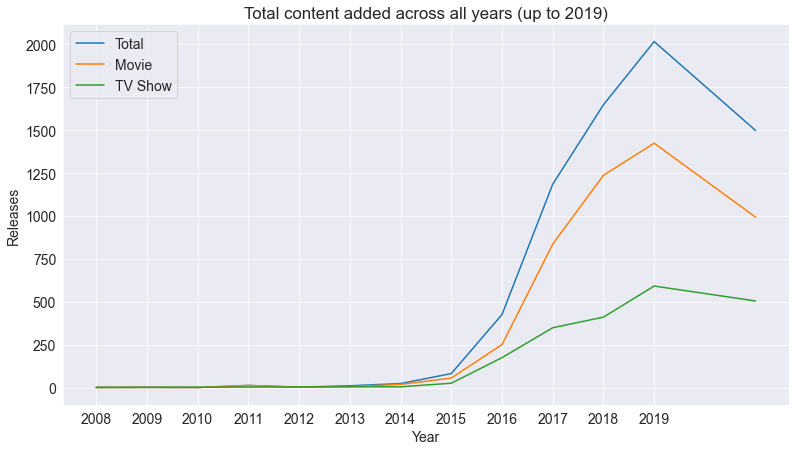

In [62]:
fig, ax = plt.subplots(figsize=(13, 7))
sns.lineplot(data=netflix_year_df, x='year', y='date_added')
sns.lineplot(data=movies_year_df, x='year', y='date_added')
sns.lineplot(data=shows_year_df, x='year', y='date_added')
ax.set_xticks(np.arange(2008, 2020, 1))
plt.title("Total content added across all years (up to 2019)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

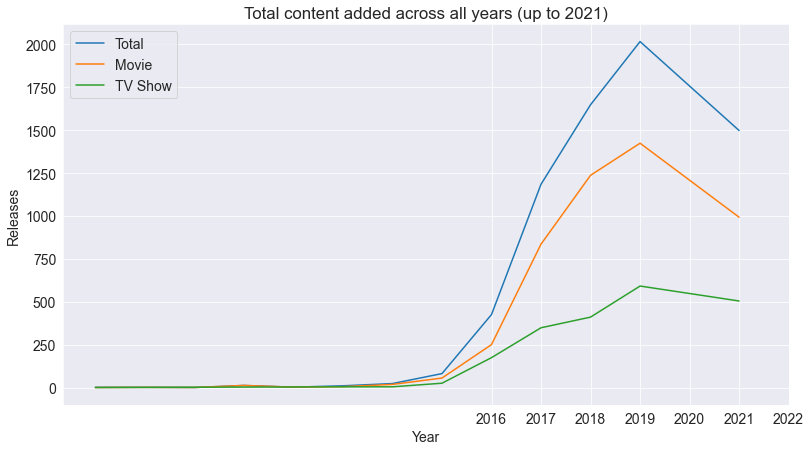

In [63]:
fig, ax = plt.subplots(figsize=(13, 7))
sns.lineplot(data=netflix_year_df, x='year', y='date_added')
sns.lineplot(data=movies_year_df, x='year', y='date_added')
sns.lineplot(data=shows_year_df, x='year', y='date_added')
ax.set_xticks(np.arange(2016, 2023))
plt.title("Total content added across all years (up to 2021)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

### Now we can see a small line graph of content released yearly to get a good understanding about Growth in content.

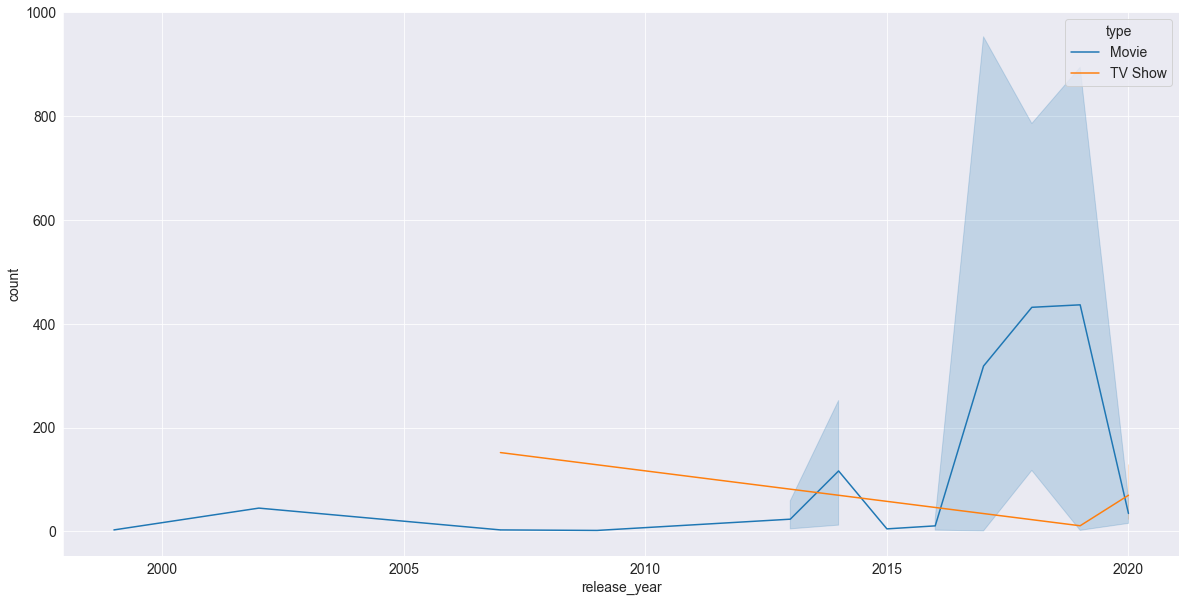

In [64]:
netflix_overall['count'] = 1
plt.figure(figsize = (20,10))
sns.lineplot(x = 'release_year', y = netflix_overall.groupby(['release_year'])['count'].count(), hue = 'type', data = netflix_overall)
plt.show()

# Output of above chart

### --> movies are completely down at the end of the 2020
### --> Tv shows are increase in 2020
### --> No one can go to the theaters are all see in the TV shows

#     Date Explore into Year, Month, Day

In [65]:
netflix_overall["date_added"] = pd.to_datetime(netflix_overall['date_added'])

netflix_overall['month_added']=netflix_overall['date_added'].dt.month
netflix_overall['month_name_added']=netflix_overall['date_added'].dt.month_name()
netflix_overall['year_added'] = netflix_overall['date_added'].dt.year
netflix_overall['day_added'] = netflix_overall['date_added'].dt.day

In [66]:
netflix_overall.describe()

release_year   count  month_added   year_added    day_added
count   8790.000000  8790.0  8790.000000  8790.000000  8790.000000
mean    2014.183163     1.0     6.655859  2018.873606    12.500000
std        8.825466     0.0     3.436103     1.573568     9.887635
min     1925.000000     1.0     1.000000  2008.000000     1.000000
25%     2013.000000     1.0     4.000000  2018.000000     1.000000
50%     2017.000000     1.0     7.000000  2019.000000    13.000000
75%     2019.000000     1.0    10.000000  2020.000000    20.000000
max     2021.000000     1.0    12.000000  2021.000000    31.000000

In [67]:
netflix_overall

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water      No Director   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans      No Director   
4         s5  TV Show           Kota Factory      No Director   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb      No Director   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast              country  \
0                                               No Cast        United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...         South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  Country Unavailable   
3                                               No Cast  Country Unavailable   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...                India   
...                                                 ...                  ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...        United States   
8803                                            No Cast  Country Unavailable   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...        United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...        United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...                India   

     date_added  release_year rating   duration  \
0    2021-09-25          2020  PG-13     90 min   
1    2021-09-24          2021  TV-MA  2 Seasons   
2    2021-09-24          2021  TV-MA   1 Season   
3    2021-09-24          2021  TV-MA   1 Season   
4    2021-09-24          2021  TV-MA  2 Seasons   
...         ...           ...    ...        ...   
8802 2019-11-20          2007      R    158 min   
8803 2019-07-01          2018  TV-Y7  2 Seasons   
8804 2019-11-01          2009      R     88 min   
8805 2020-01-11          2006     PG     88 min   
8806 2019-03-02          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  count  month_added  \
0     As her father nears the end of his life, filmm...      1            9   
1     After crossing paths at a party, a Cape Town t...      1            9   
2     To protect his family from a powerful drug lor...      1            9   
3     Feuds, flirtations and toilet talk go down amo...      1            9   
4     In a city of coaching centers known to train I...      1            9   
...                                                 ...    ...          ...   
8802  A political cartoonist, a crime reporter and a...      1           11   
8803  While living alone in a spooky town, a young g...      1            7   
8804  Looking to survive in a world taken over by zo...      1           11   
8805  Dragged from civilian life, a former superhero...      1            1   
8806  A scrappy but poor boy worms his way into a ty...      1          

<AxesSubplot:>

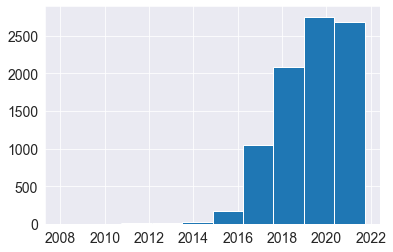

In [68]:
# Plotting Histogram of how many Movies/TV/Shows added in Netflix each year
netflix_overall['date_added'].hist()

In [69]:
netflix_overall['date_added'].dt.month

0        9
1        9
2        9
3        9
4        9
        ..
8802    11
8803     7
8804    11
8805     1
8806     3
Name: date_added, Length: 8790, dtype: int64

# Explore the data in Day, Month, Year

In [70]:
netflix_overall['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

In [71]:
netflix_overall['release_year'].nunique()

74

In [72]:
netflix_overall['listed_in'].nunique()

513

# Yearly Release

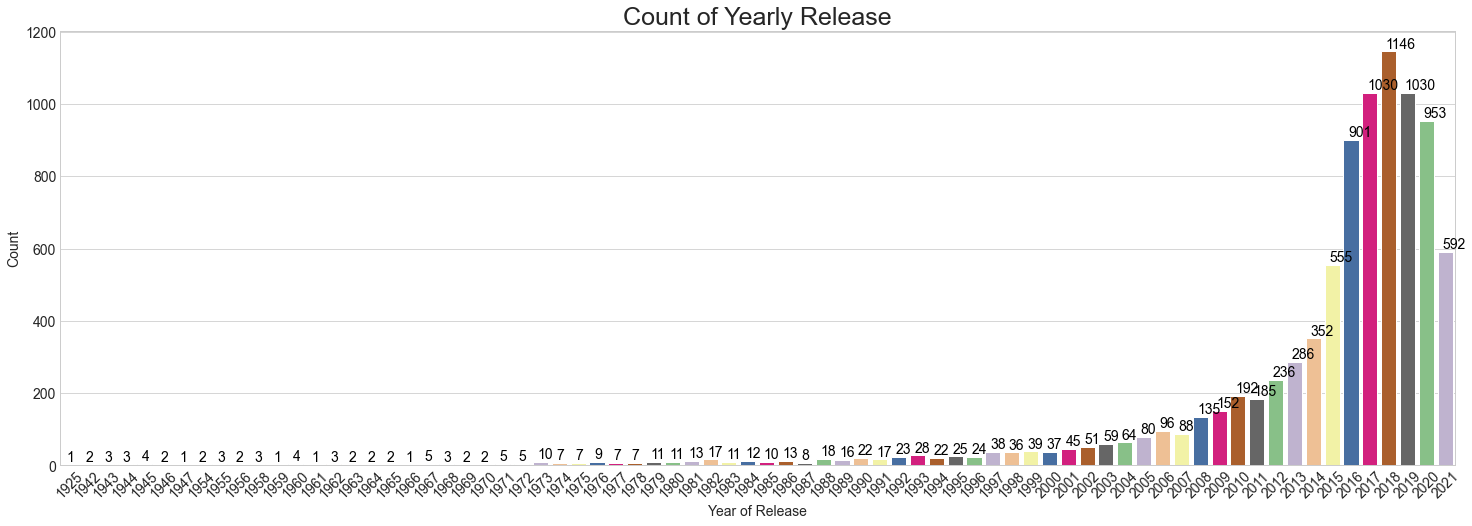

In [73]:
plt.figure(figsize=(25,8))
plt.style.use('seaborn-whitegrid')
ax=sns.countplot(x='release_year',data=netflix_overall,palette="Accent")
plt.title("Count of Yearly Release", size = 25)
plt.xlabel('Year of Release')
plt.ylabel('Count')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

In [74]:
# Plotting Histogram of How many Movies tv shows releases each year-ploty
px.histogram(netflix_overall,x="release_year",color="release_year")

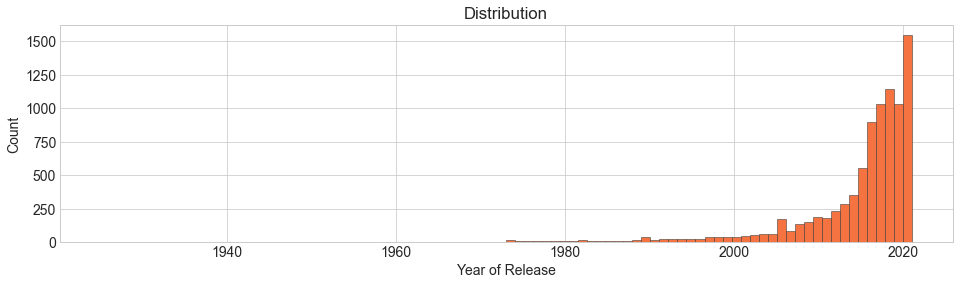

In [75]:
# Plotting Histogram of how many Movies tv shows released each year-matplotlib
plt.figure(figsize=(16,4))
plt.style.use('seaborn-whitegrid')
plt.hist(netflix_overall['release_year'],bins=90,facecolor = '#F47340', edgecolor='#323232', linewidth=0.5)
plt.title('Distribution')
plt.xlabel('Year of Release')
plt.ylabel('Count')
plt.show()

In [76]:
top_release_years = (
    netflix_overall['release_year']
    .value_counts()
    .head(15)
)
top_release_years

2018    1146
2017    1030
2019    1030
2020     953
2016     901
2021     592
2015     555
2014     352
2013     286
2012     236
2010     192
2011     185
2009     152
2008     135
2006      96
Name: release_year, dtype: int64

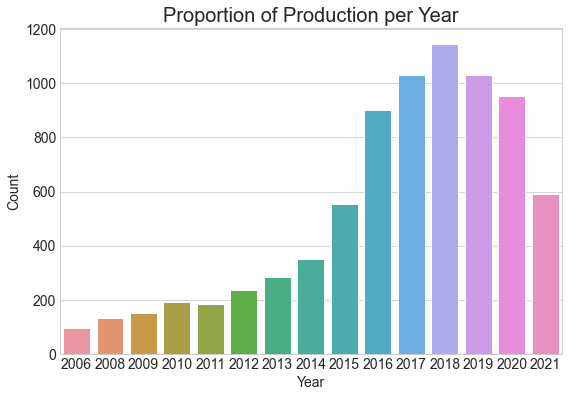

In [77]:
plt.figure(figsize=(9, 6))
sns.barplot(x=top_release_years.index, y=top_release_years.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Proportion of Production per Year', size = 20)  # In APA style
plt.show()

<AxesSubplot:>

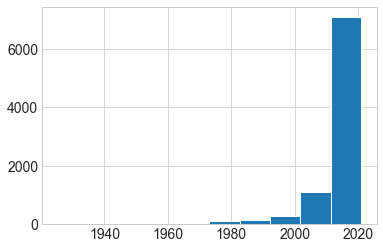

In [78]:
# Plotting Histogram of how many Movies/TV shows released each year
netflix_overall["release_year"].hist()

# Monthly content added

In [79]:
netflix_overall["date_added_month"]=netflix_overall["date_added"].dt.month.fillna(-1)
netflix_overall['date_added_month'].unique()

array([ 9,  8,  7,  6,  5,  4,  3,  2,  1, 12, 11, 10], dtype=int64)

In [80]:
netflix_overall['date_added_month']=netflix_overall['date_added_month'].astype('Int64')
netflix_overall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8790 non-null   object        
 1   type              8790 non-null   object        
 2   title             8790 non-null   object        
 3   director          8790 non-null   object        
 4   cast              8790 non-null   object        
 5   country           8790 non-null   object        
 6   date_added        8790 non-null   datetime64[ns]
 7   release_year      8790 non-null   int64         
 8   rating            8790 non-null   object        
 9   duration          8790 non-null   object        
 10  listed_in         8790 non-null   object        
 11  description       8790 non-null   object        
 12  count             8790 non-null   int64         
 13  month_added       8790 non-null   int64         
 14  month_name_added  8790 n

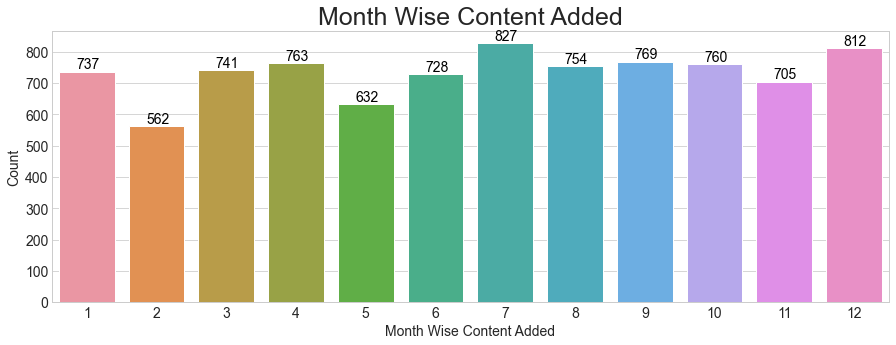

In [81]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="date_added_month",data=netflix_overall)
plt.title("Month Wise Content Added", size = 25)
plt.xlabel('Month Wise Content Added')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

In [82]:
months_name = (
    pd.to_datetime(netflix_overall['date_added'])
    .dt.month_name()
)
months_name

0       September
1       September
2       September
3       September
4       September
          ...    
8802     November
8803         July
8804     November
8805      January
8806        March
Name: date_added, Length: 8790, dtype: object

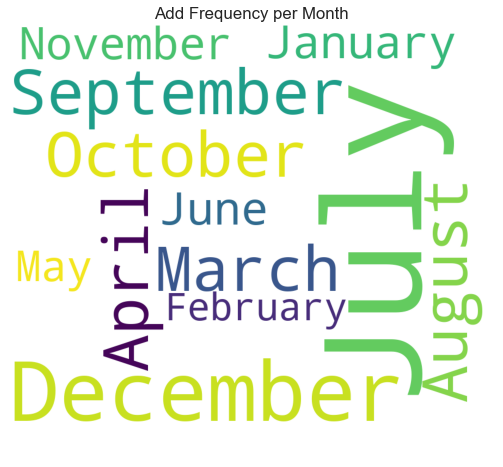

In [83]:
plt.figure(figsize=(9, 8))
wordcloud = (
    WordCloud(width=900, height=800, background_color='white')
    .generate_from_frequencies(months_name.value_counts())
)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Add Frequency per Month')
plt.show()

In [84]:
content_type_and_upload_month = (
    pd.concat([netflix_overall['type'], months_name], axis=1)
    .rename(columns={'date_added': 'month_added'})
    .value_counts()
)
content_type_and_upload_month

type     month_added
Movie    July           565
         April          549
         December       547
         January        545
         October        545
         March          528
         September      518
         August         518
         November       498
         June           492
         May            439
         February       382
TV Show  December       265
         July           262
         September      251
         August         236
         June           236
         October        215
         April          214
         March          213
         November       207
         May            193
         January        192
         February       180
dtype: int64

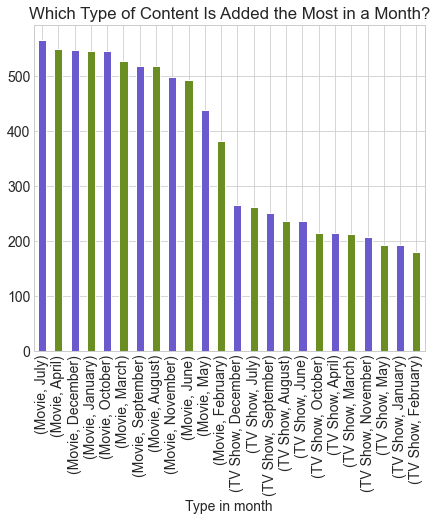

In [85]:
plt.figure(figsize=(7, 6))
content_type_and_upload_month.plot(kind='bar', stacked=True, color=['slateblue', 'olivedrab'])
plt.xlabel('Type in month')
plt.title('Which Type of Content Is Added the Most in a Month?')
plt.show()

In [86]:
content_type_and_upload_month_df = (  # Oh, the names...
    content_type_and_upload_month
    .reset_index()
    .rename(columns={0: 'count'})
)
content_type_and_upload_month_df

type month_added  count
0     Movie        July    565
1     Movie       April    549
2     Movie    December    547
3     Movie     January    545
4     Movie     October    545
5     Movie       March    528
6     Movie   September    518
7     Movie      August    518
8     Movie    November    498
9     Movie        June    492
10    Movie         May    439
11    Movie    February    382
12  TV Show    December    265
13  TV Show        July    262
14  TV Show   September    251
15  TV Show      August    236
16  TV Show        June    236
17  TV Show     October    215
18  TV Show       April    214
19  TV Show       March    213
20  TV Show    November    207
21  TV Show         May    193
22  TV Show     January    192
23  TV Show    February    180

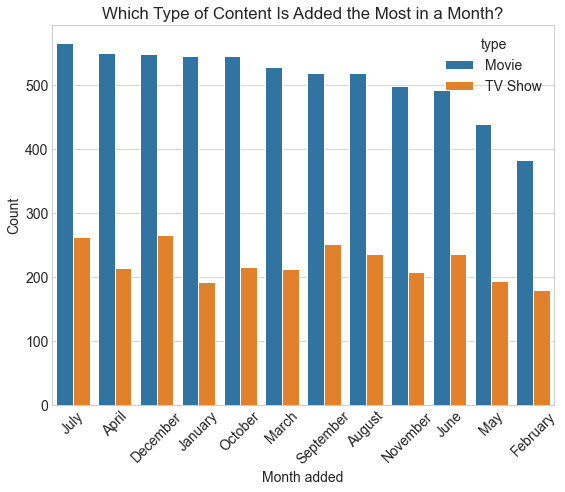

In [87]:
plt.figure(figsize=(9, 7))
sns.barplot(data=content_type_and_upload_month_df, x='month_added', y='count', hue='type')
plt.xticks(rotation=45)
plt.xlabel('Month added')
plt.ylabel('Count')
plt.title('Which Type of Content Is Added the Most in a Month?')
plt.show()

# Day

In [88]:
netflix_overall['date_added_day']=netflix_overall['date_added'].dt.day.fillna(-1)
netflix_overall["date_added_day"].unique()

array([25, 24, 23, 22, 21, 20, 19, 17, 16, 15, 14, 11, 10,  9,  8,  7,  6,
        5,  4,  3,  2,  1, 31, 29, 28, 27, 26, 18, 13, 12, 30],
      dtype=int64)

In [89]:
netflix_overall['date_added_day']=netflix_overall['date_added_day'].astype('Int64')
netflix_overall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8790 non-null   object        
 1   type              8790 non-null   object        
 2   title             8790 non-null   object        
 3   director          8790 non-null   object        
 4   cast              8790 non-null   object        
 5   country           8790 non-null   object        
 6   date_added        8790 non-null   datetime64[ns]
 7   release_year      8790 non-null   int64         
 8   rating            8790 non-null   object        
 9   duration          8790 non-null   object        
 10  listed_in         8790 non-null   object        
 11  description       8790 non-null   object        
 12  count             8790 non-null   int64         
 13  month_added       8790 non-null   int64         
 14  month_name_added  8790 n

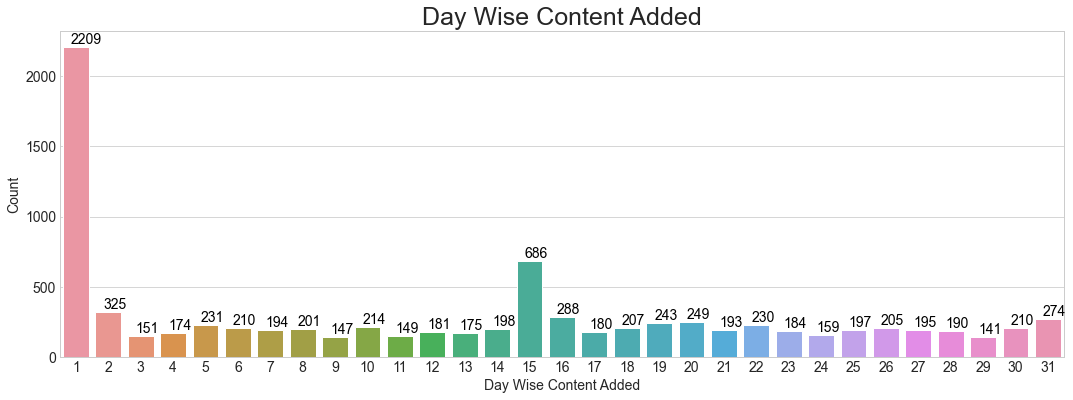

In [90]:
plt.figure(figsize = (18, 6))
ax = sns.countplot(x = 'date_added_day', data = netflix_overall)
plt.title("Day Wise Content Added", size = 25)
plt.xlabel('Day Wise Content Added')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

# ratings of Netflix

In [91]:
netflix_overall["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [92]:
rating_all = netflix_overall.groupby('rating')['rating'].count().sort_values(ascending = False)
print(rating_all)

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64


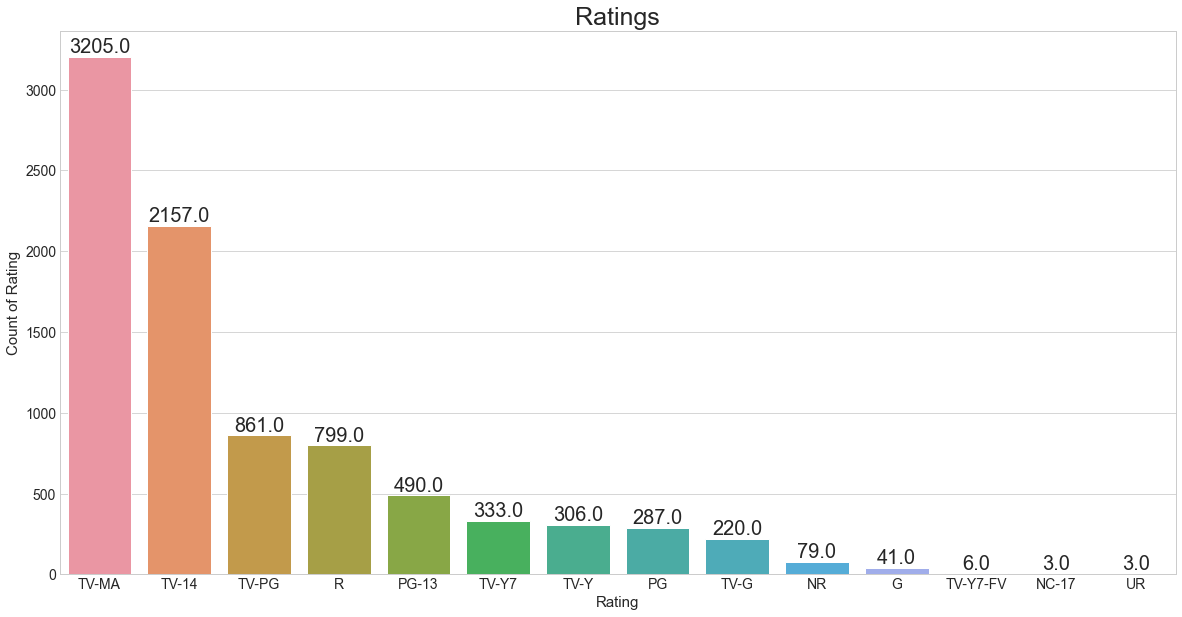

In [93]:
plt.figure(figsize = (20,10))
dff = sns.barplot(x = rating_all.index,y = rating_all, data = netflix_overall)
for p in dff.patches:
    dff.annotate(p.get_height(), xy = (int(p.get_width()/2 + p.get_x()), p.get_height()), ha = 'center', va = 'bottom', size = 20)
plt.title("Ratings", size = 25)
plt.xlabel('Rating', size = 15)
plt.ylabel('Count of Rating', size = 15)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



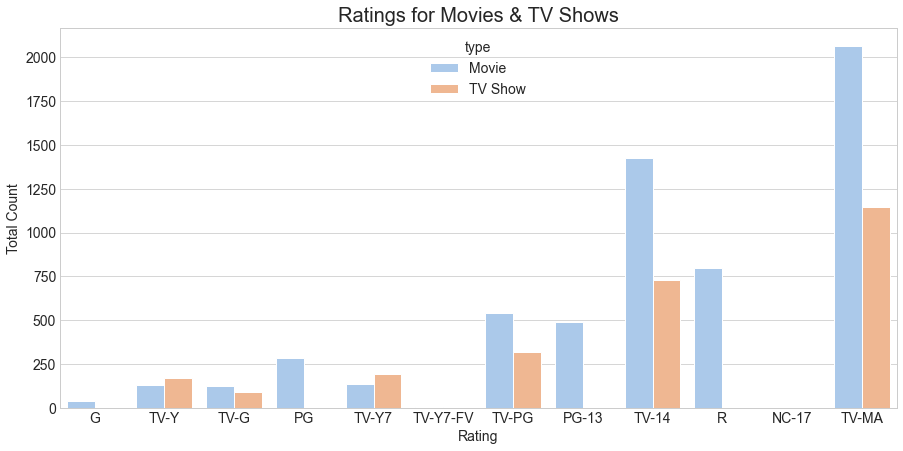

In [94]:
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(15,7))
g = sns.countplot(netflix_overall.rating, hue=netflix_overall.type, order=order, palette="pastel");
plt.title("Ratings for Movies & TV Shows", size = 20)
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

In [95]:
release_year1 = netflix_overall.groupby('release_year')['release_year'].count().sort_values(ascending = False)[:10]
release_year1_2 = netflix_overall.groupby('release_year')['release_year'].count()
print(release_year1)
Data_type = netflix_overall.groupby('type')['type'].count()
print(Data_type)

release_year
2018    1146
2019    1030
2017    1030
2020     953
2016     901
2021     592
2015     555
2014     352
2013     286
2012     236
Name: release_year, dtype: int64
type
Movie      6126
TV Show    2664
Name: type, dtype: int64


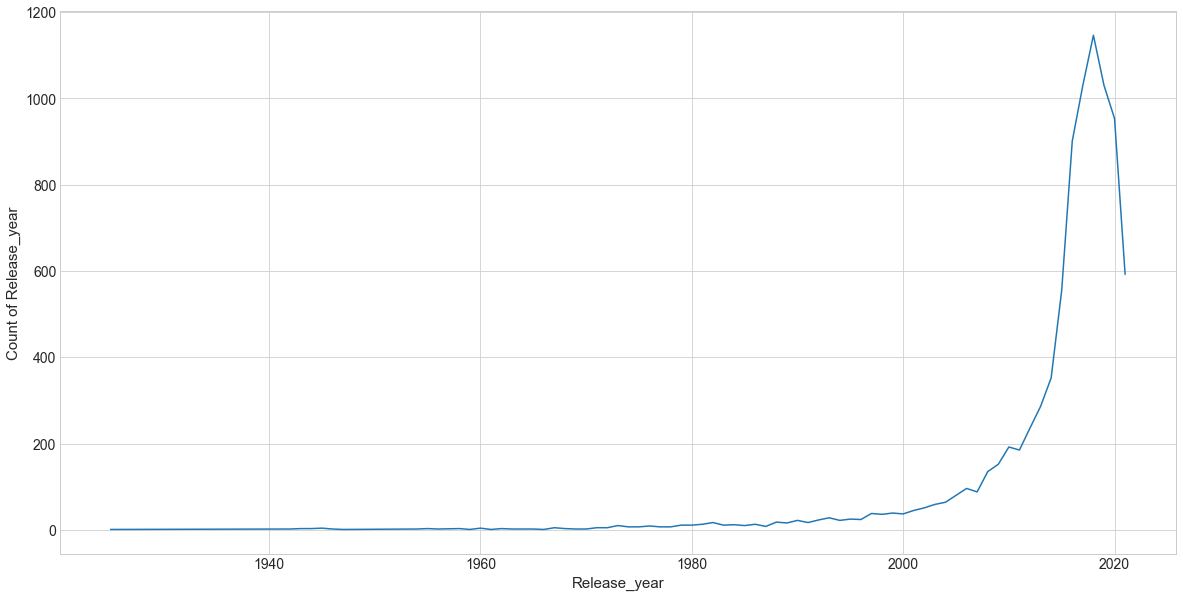

In [96]:
plt.figure(figsize = (20,10))
dff = sns.lineplot(x = release_year1_2.index, y = release_year1_2, data = release_year1_2, palette = 'rocket')
for p in dff.patches:
    dff.annotate(p.get_height(), xy = (int(p.get_width()/2 + p.get_x()), p.get_height()), ha = 'center', va = 'bottom')
plt.xlabel('Release_year', size = 15)
plt.ylabel('Count of Release_year', size = 15)
plt.show()

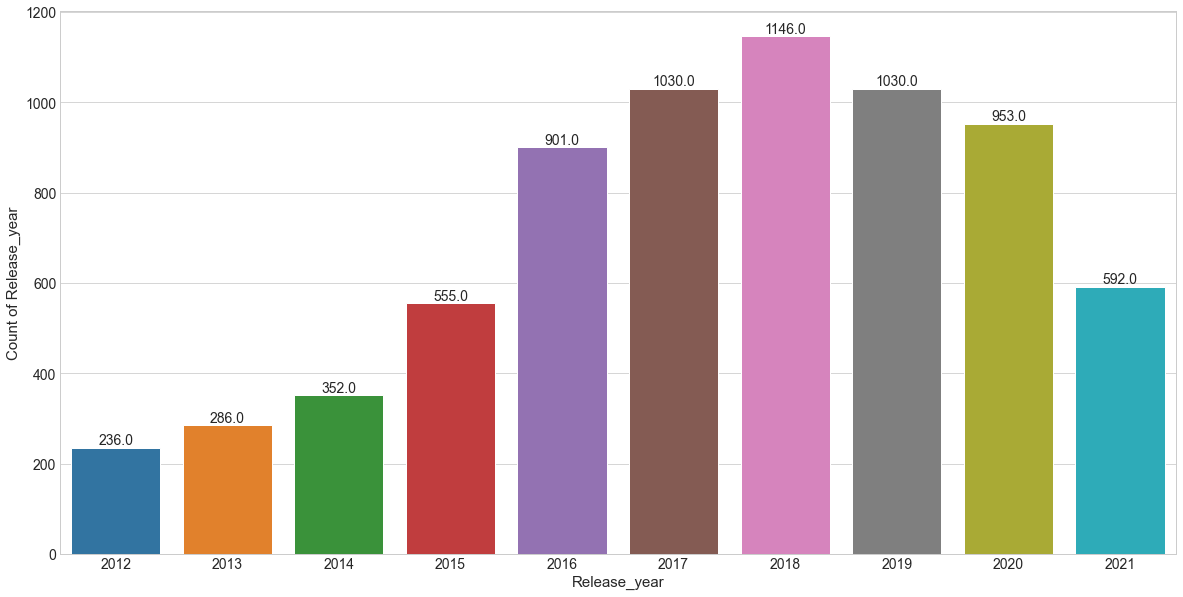

In [97]:
plt.figure(figsize = (20,10))
dff = sns.barplot(x = release_year1.index, y = release_year1, data = netflix_overall)
for p in dff.patches:
    dff.annotate(p.get_height(), xy = (int(p.get_width()/2 + p.get_x()), p.get_height()), ha = 'center', va = 'bottom')
plt.xlabel('Release_year', size = 15)
plt.ylabel('Count of Release_year', size = 15)   
plt.show()